In [1]:
!git clone https://github.com/drewcark/DS5500-drug-discovery
%cd DS5500-drug-discovery

!git pull origin main

import zipfile
zip_fp = 'drugbank.csv.zip'
with zipfile.ZipFile(zip_fp, 'r') as zip_ref:
    zip_ref.extractall('/content/DS5500-drug-discovery/')

!unzip 'drugbank.csv.zip' - d /content/DS5500-drug-discovery/

zip_fp = 'smiles_updated.csv.zip'
with zipfile.ZipFile(zip_fp, 'r') as zip_ref:
    zip_ref.extractall('/content/DS5500-drug-discovery/')

!unzip 'smiles_updated.csv.zip' - d /content/DS5500-drug-discovery/

Cloning into 'DS5500-drug-discovery'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 77 (delta 27), reused 5 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 80.93 MiB | 10.60 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/DS5500-drug-discovery
From https://github.com/drewcark/DS5500-drug-discovery
 * branch            main       -> FETCH_HEAD
Already up to date.
Archive:  drugbank.csv.zip
caution: filename not matched:  -
caution: filename not matched:  d
caution: filename not matched:  /content/DS5500-drug-discovery/
Archive:  smiles_updated.csv.zip
caution: filename not matched:  -
caution: filename not matched:  d
caution: filename not matched:  /content/DS5500-drug-discovery/


In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from tabulate import tabulate


ddi_fp = '/content/DS5500-drug-discovery/drugbank.csv'

ddi = pd.read_csv(ddi_fp, sep='\t')

kaggle_fp = '/content/DS5500-drug-discovery/smiles_updated.csv'

smiles = pd.read_csv(kaggle_fp, sep='\t')
smiles1 = smiles['SMILES,CHEMBL'].str.split(',', n=1, expand=True)
smiles1.columns = ['SMILES', 'CHEMBL']
smiles1.head()

#drug_names_fp = "drugs.txt"

#drug_names = pd.read_csv(drug_names_fp, sep='\t')

,SMILES,CHEMBL
0,C,CHEMBL17564
1,CO,CHEMBL14688
2,NCCS,CHEMBL602
3,NCCN,CHEMBL816
4,CN,CHEMBL43280


In [25]:
ddi.columns

ddi[['Map']].value_counts()

,count
Map,
The risk or severity of adverse effects can be increased when #Drug1 is combined with #Drug2.,60751
The metabolism of #Drug2 can be decreased when combined with #Drug1.,34360
The serum concentration of #Drug2 can be increased when it is combined with #Drug1.,23779
The serum concentration of #Drug2 can be decreased when it is combined with #Drug1.,9470
#Drug1 may increase the hypotensive activities of #Drug2.,8397
...,...
#Drug1 may increase the dermatologic adverse activities of #Drug2.,11
#Drug1 may increase the photosensitizing activities of #Drug2.,11
#Drug1 may decrease the analgesic activities of #Drug2.,10


Y
49    60751
47    34360
73    23779
75     9470
60     8397
      ...  
28       11
1        11
52       10
26        7
42        6
Name: count, Length: 86, dtype: int64
{36} {94}
{22} {94}
{17} {83}
{51} {83}
{18} {82}
{48} {69}
{35} {69}
{84} {65}
{80} {64}
{23} {56}
{13} {45}
{59} {43}
{63} {34}
{56} {33}
{38} {33}
{45} {33}
{65} {32}
{78} {28}
{79} {27}
{86} {27}
{50} {26}
{46} {26}
{7} {21}
{41} {14}
{31} {14}
{44} {13}
{62} {11}
{43} {11}
{28} {11}
{1} {11}
{52} {10}
{26} {7}
{42} {6}


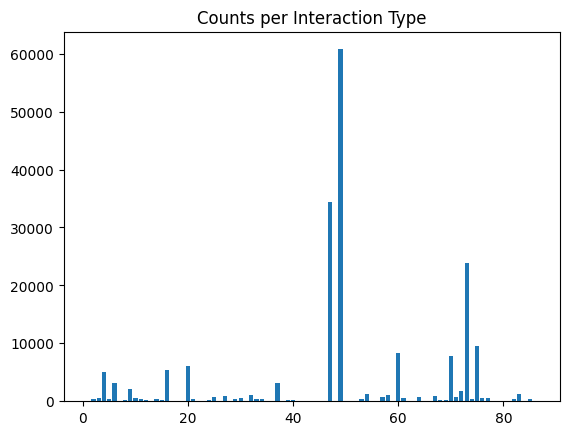

In [17]:

ddi[['ID1', 'ID2', 'X1', 'X2', 'Y']]
interaction_counts = ddi['Y'].value_counts()
print(interaction_counts)
plt.bar(interaction_counts.index, interaction_counts.values)
plt.title('Counts per Interaction Type')

for value, count in interaction_counts.items():
  if count < 100:
    print({value}, {count})
